In [2]:
%matplotlib inline
import rasterio
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import glob
import os

matplotlib.rcParams['axes.formatter.useoffset'] = False

In [3]:
# os.chdir('/mnt/i/hyp3_downloads/p81f1048_10x2_2')
os.chdir('I:\\hyp3_downloads\\p81f1048_10x2_2')

folders = glob.glob('S1*')
images = [os.path.join(x,f'{os.path.basename(x)}_unw_phase.tif') for x in folders if 'zip' not in x]
len(images)

288

In [4]:
df = pd.DataFrame(columns=['date12','date1','date2','left','right','top','bottom'])

for i in images:
    with rasterio.open(i) as raster:
        bounds = raster.bounds
    dates = os.path.basename(i)[5:36]
    date1, date2 = [datetime.strptime(x,'%Y%m%dT%H%M%S') for x in dates.split('_')]
    df = df.append({'date12':dates,'date1':date1,'date2':date2,'left':bounds.left,'right':bounds.right,'top':bounds.top,'bottom':bounds.bottom},ignore_index=True)

Coordinate ranges
left      320.0
right     240.0
top       240.0
bottom    160.0
dtype: float64


Drops 2 dates and 11 interferograms:
['20180716T070629', '20180704T070628']


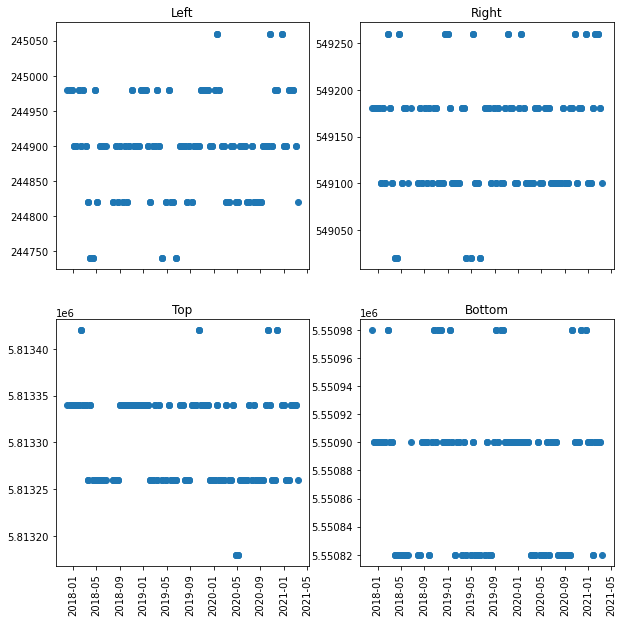

In [17]:
# a larger limit will include more interferograms
limit = 350

top = df['top'].max() - limit
bottom = df['bottom'].min() + limit
left = df['left'].min() + limit
right = df['right'].max() - limit

plot_df = df.loc[(df['left'] <= left) & (df['right'] >= right) & (df['top'] >= top) & (df['bottom'] <= bottom)]

dropped_dates = set(df['date1']).union(set(df['date2'])) - set(plot_df['date1']).union(set(plot_df['date2']))
dropped_ints = set(df['date12']) - set(plot_df['date12'])
formatted_dates = [x.strftime('%Y%m%dT%H%M%S') for x in list(dropped_dates)]

print('Coordinate ranges')
print(plot_df[['left','right','top','bottom']].max() - plot_df[['left','right','top','bottom']].min())
print('\n')

print(f'Drops {len(dropped_dates)} dates and {len(dropped_ints)} interferograms:')
print(formatted_dates)

fig, axs = plt.subplots(2,2,sharex=True,sharey=False,figsize=(10,10))
for ax,i in zip(axs.flatten(),['left','right','top','bottom']):
    ax.scatter(plot_df['date1'],plot_df[i])
    ax.set_title(i.capitalize())
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.show()